# The analysis of relations between the total covid-affected population and other datas

Author: Haoyang Wang

Course Project, UC Irvine, Math 10, F22

## Introduction

During the pandemic, millions of people get affected by covid-19. This project is for finding the relationship between how many people were affected in total (Total Cases) and other datas (Population, pcr-Test etc.). The project used pandas, altair, seaborn, and machine learning tools in finding the relation.

## Explore the datas by using Pandas

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

First, let's see what the dataset generally looks like.

In [2]:
df = pd.read_csv("Covid Live.csv")
df.head()

# Country,\nOther Total\nCases Total\nDeaths  New\nDeaths Total\nRecovered  \
0  1             USA   98,166,904     1,084,282          NaN       94,962,112   
1  2           India   44,587,307       528,629          NaN       44,019,095   
2  3          France   35,342,950       155,078          NaN       34,527,115   
3  4          Brazil   34,706,757       686,027          NaN       33,838,636   
4  5         Germany   33,312,373       149,948          NaN       32,315,200   

  Active\nCases Serious,\nCritical Tot Cases/\n1M pop Deaths/\n1M pop  \
0     2,120,510              2,970            293,206           3,239   
1        39,583                698             31,698             376   
2       660,757                869            538,892           2,365   
3       182,094              8,318            161,162           3,186   
4       847,225              1,406            397,126           1,788   

    Total\nTests Tests/\n1M pop     Population  
0  1,118,158,870      3,339,729    334,805,269  
1    894,416,853        635,857  1,406,631,776  
2    271,490,188      4,139,547     65,584,518  
3     63,776,166        296,146    215,353,593  
4    122,332,384      1,458,359     83,883,596

I noticed that there are something wrong with the columns‘ names for the dataframe. Therefore, for calling the columns easily, I rename the dataframe.

In [3]:
# Call columns to make sure store their true name in the dictionary later
df.columns

Index(['#', 'Country,\nOther', 'Total\nCases', 'Total\nDeaths', 'New\nDeaths',
       'Total\nRecovered', 'Active\nCases', 'Serious,\nCritical',
       'Tot Cases/\n1M pop', 'Deaths/\n1M pop', 'Total\nTests',
       'Tests/\n1M pop', 'Population'],
      dtype='object')

In [4]:
# Use the dictionary help me with renaming
col_name = {'Country,\nOther':"Country", 'Total\nCases':"Total Cases", 'Total\nDeaths':"Total Deaths", 'New\nDeaths':"New Deaths",
       'Total\nRecovered':"Total Recovered", 'Active\nCases':"Active Cases", 'Serious,\nCritical':"Serious Criticals",
       'Tot Cases/\n1M pop':"Total Cases/m", 'Deaths/\n1M pop':"Deaths/m", 'Total\nTests':"Total Test",
       'Tests/\n1M pop':"Tests/m"}

In [5]:
df.rename(col_name, axis=1, inplace=True)
df.head()

#  Country Total Cases Total Deaths  New Deaths Total Recovered  \
0  1      USA  98,166,904    1,084,282         NaN      94,962,112   
1  2    India  44,587,307      528,629         NaN      44,019,095   
2  3   France  35,342,950      155,078         NaN      34,527,115   
3  4   Brazil  34,706,757      686,027         NaN      33,838,636   
4  5  Germany  33,312,373      149,948         NaN      32,315,200   

  Active Cases Serious Criticals Total Cases/m Deaths/m     Total Test  \
0    2,120,510             2,970       293,206    3,239  1,118,158,870   
1       39,583               698        31,698      376    894,416,853   
2      660,757               869       538,892    2,365    271,490,188   
3      182,094             8,318       161,162    3,186     63,776,166   
4      847,225             1,406       397,126    1,788    122,332,384   

     Tests/m     Population  
0  3,339,729    334,805,269  
1    635,857  1,406,631,776  
2  4,139,547     65,584,518  
3    296,146    215,353,593  
4  1,458,359     83,883,596

Drop missing values and the whole "New Deaths" column because it almost have no data.

In [6]:
del df["New Deaths"] #"del" reference: https://www.educative.io/answers/how-to-delete-a-column-in-pandas
df = df.dropna(axis=0).copy()
df.head()

#  Country Total Cases Total Deaths Total Recovered Active Cases  \
0  1      USA  98,166,904    1,084,282      94,962,112    2,120,510   
1  2    India  44,587,307      528,629      44,019,095       39,583   
2  3   France  35,342,950      155,078      34,527,115      660,757   
3  4   Brazil  34,706,757      686,027      33,838,636      182,094   
4  5  Germany  33,312,373      149,948      32,315,200      847,225   

  Serious Criticals Total Cases/m Deaths/m     Total Test    Tests/m  \
0             2,970       293,206    3,239  1,118,158,870  3,339,729   
1               698        31,698      376    894,416,853    635,857   
2               869       538,892    2,365    271,490,188  4,139,547   
3             8,318       161,162    3,186     63,776,166    296,146   
4             1,406       397,126    1,788    122,332,384  1,458,359   

      Population  
0    334,805,269  
1  1,406,631,776  
2     65,584,518  
3    215,353,593  
4     83,883,596

I noticed that the data in the columns are strings with comma. I need to convert them into numeric type for manipulating easier.

In [7]:
# first, find the columns who are string
from pandas.api.types import is_string_dtype
str_col = [i for i in df.columns if is_string_dtype(df[i])]

# the first string column is "Country", drop it
str_col = str_col[1:]

In [8]:
# Delete the commas, then convert the string columns into numberic
for i in str_col:
    df[i] = df[i].str.replace(",","")
    df[i] = pd.to_numeric(df[i])

## Visualization by Altair and Seaborn

First of all, I'd like to see whether the population and the density (total cases/million people) of affected patients have a strong relation. In other words, is the population affect the possibility of being affected.

In [9]:
alt.Chart(df).mark_circle().encode(
    x = alt.X("Population",sort="ascending"),
    y = alt.Y("Total Cases/m",sort="ascending"),
    tooltip = ("Country","Total Cases")
).interactive()

alt.Chart(...)

I use selection for showing the details.

In [10]:
sel = alt.selection_interval()

c1 = alt.Chart(df).mark_circle().encode(
    x =alt.X("Population", scale=alt.Scale(domain=[0,400000000])),
    y ="Total Cases/m",
    tooltip = ("Country","Total Cases"),
    color = alt.condition(sel, alt.value("Black"), "Population")
).add_selection(sel)

c2 = alt.Chart(df).mark_bar().encode(
    x ="Country",
    y ="Total Cases/m", 
    color ="Country"
).transform_filter(sel)

alt.vconcat(c1,c2) # Can choose a rectangle by mouse to see the datas specifically

alt.VConcatChart(...)

Without considering the outliars (China and India), we could say that it is hard to observe the strong relation between the density of affected patients and the population. Thus, I'd like check whether Test helps in preventing people from affected.

<AxesSubplot:xlabel='Tests/m', ylabel='Total Cases/m'>

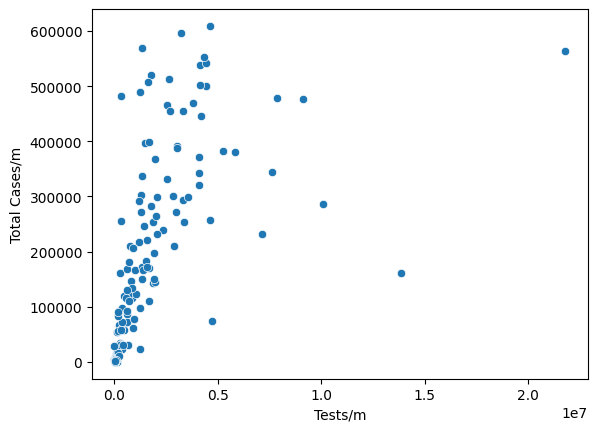

In [11]:
sns.scatterplot(
    data = df,
    x = "Tests/m",
    y = "Total Cases/m"
)

Surprisingly, a negative relation (which impies tests do prevent people from affected) is not observed here between Tests/m and Total Cases/m.

## DecisionTreeRegressor

Though the relations between other datas and "Total Tests" are hard to be observed, I'm going to use machine learning to try to predict the "Total Tests" by using other datas as input.

For avoiding repeat affection on the prediction result, I will delete some of the inputs which are repeated, for example, "Total Test", and "Tests/m".

In [12]:
cols = [i for i in str_col if i[-2:] != "/m"]
cols = cols[1:] #the first one is "Total Cases" (predict result), drop it

In [13]:
from sklearn.model_selection import train_test_split
X = df[cols]
y = df["Total Cases/m"]
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=.8,random_state=59547172)

In [14]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
reg.score(X_test, y_test) #the predicted result not seems good, might be overfitting

0.33628386401402366

In [16]:
reg.score(X_train, y_train) # 1.0 implies there is overfitting

1.0

the feature importances seem not really make sense to me

In [17]:
pd.Series(reg.feature_importances_, index=reg.feature_names_in_)

Total Deaths         0.049213
Total Recovered      0.343638
Active Cases         0.035992
Serious Criticals    0.011876
Total Test           0.126348
Population           0.432932
dtype: float64

To make sure I use a proper max_leaf_nodes number, I will make a U-shape test error curve first.

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
train_dic = {}
test_dic = {}

for i in range(2,100):
    reg = DecisionTreeRegressor(criterion = "absolute_error", 
    max_leaf_nodes = i)
    reg.fit(X_train, y_train)
    train_dic[i] = mean_absolute_error(y_train, reg.predict(X_train))
    test_dic[i] = mean_absolute_error(y_test, reg.predict(X_test))

In [20]:
train_loss = pd.Series(train_dic)
test_loss = pd.Series(test_dic)
train_loss.name = "train"
test_loss.name = "test"
df_loss = pd.concat((train_loss, test_loss), axis=1)
df_loss.reset_index(inplace=True)
df_loss.rename({"index": "max_leaf_nodes"}, axis=1, inplace=True)
df_melted = df_loss.melt(id_vars="max_leaf_nodes", var_name="error_type", value_name="loss")

The curve is not typically U-shaped, and the best max_leaf_nodes here I can choose where is not overfitting is 17. (Actually, I also check 37, but the score of train data is .98 versus .70 test score, which implies overfitting, so I just discard 37.)

In [21]:
alt.Chart(df_melted).mark_line().encode(
    x = "max_leaf_nodes",
    y = "loss",
    color = "error_type",
    tooltip = "max_leaf_nodes"
)

alt.Chart(...)

Do the DicisionTreeRegressor again.

In [22]:
reg2 = DecisionTreeRegressor(max_leaf_nodes=17)

In [23]:
reg2.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=17)

In [ ]:
reg2.score(X_test, y_test) # the score still not perform well

0.6106858707481919

## RandomForestRegressor

I will use randomforest to make the predict more accurate.

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
forest_reg = RandomForestRegressor(n_estimators=100, max_leaf_nodes=17)

In [28]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=17)

In [29]:
forest_reg.score(X_test, y_test)

0.7140076019321402

In [30]:
df["pred"] = forest_reg.predict(df[cols])

In [31]:
c1 = alt.Chart(df).mark_circle(color="black").encode(
    x = alt.X("Population", scale=alt.Scale(domain=[0,400000000])),
    y = "Total Cases",
    tooltip = "Country"
)

c2  = alt.Chart(df).mark_circle(color="red").encode(
    x = alt.X("Population", scale=alt.Scale(domain=[0,400000000])),
    y = "pred"
)

c1+c2

alt.LayerChart(...)

The chart is not performing good, I think the outliars make a lot effects on the predicted result.

## KNeighborsRegressir

I will use KNeighborsRegressor to check the predict result again.

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
# Again, start with finding the best k
def get_scores(k):
    K_reg=KNeighborsRegressor(n_neighbors=k)
    K_reg.fit(X_train, y_train)
    train_error=mean_absolute_error(K_reg.predict(X_train), y_train)
    test_error=mean_absolute_error(K_reg.predict(X_test), y_test)
    return (train_error, test_error)

In [34]:
df_k = pd.DataFrame(columns=("train_error", "test_error"))

In [35]:
df_k["train_error"] = [get_scores(k)[0] for k in range(1,100)]
df_k["test_error"] = [get_scores(k)[1] for k in range(1,100)]
df_k["k"] = df_k.index

By the chart, we know higher the k, bigger the error. The best K I can get from it is 5

<AxesSubplot:>

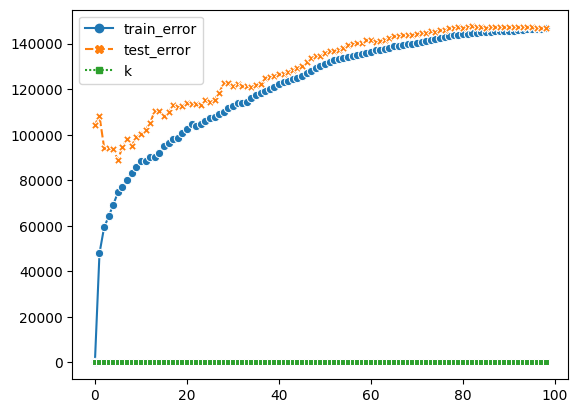

In [36]:
sns.lineplot(data=df_k, markers=True)

In [37]:
K_reg = KNeighborsRegressor(n_neighbors=5)
K_reg.fit(X_train, y_train)
df["K_predict"] = K_reg.predict(df[cols])

Still, by using KNeighbors, the predict results do not vary from randomforest a lot. Therefore, I conclude that there is no much relations between the Total Cases and other datas.

In [38]:
c3 = alt.Chart(df).mark_circle(color="black").encode(
    x = alt.X("Population", scale=alt.Scale(domain=[0,400000000])),
    y = "Total Cases",
    tooltip = "Country"
)

c4  = alt.Chart(df).mark_circle(color="red").encode(
    x = alt.X("Population", scale=alt.Scale(domain=[0,400000000])),
    y = "K_predict"
)

c3+c4

alt.LayerChart(...)

## Summary

I use pandas in cleaning and analyzing datas, altair/seaborn for visualization, and Decision Tree/Random Forest/KNeighbors in machine learning. Though I used different techniques, the predicted results do not perform well. Therefore, I would say it is hardly to oberserve a relationship between the Total Cases with other datas based on this dataframe.

## References

del: "How to delete a column in pandas" by Neko Yan, https://www.educative.io/answers/how-to-delete-a-column-in-pandas

Seaborn Visualization: Seaborn.pydata
https://seaborn.pydata.org/generated/seaborn.scatterplot.html
https://seaborn.pydata.org/generated/seaborn.lineplot.html

* What is the source of your dataset(s)?
Kaggle

* List any other references that you found helpful.
KNeighborsRegressor: Chris's previous lecture
https://christopherdavisuci.github.io/UCI-Math-10-W22/Week6/Week6-Wednesday.html

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ed82ad73-cd7d-47c0-8299-ffa3259fcf6a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>